In [204]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [205]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
columns = ['Pregnant','Glucose concentration', 'Blood pressure', 'Tricep', 'Insulin', 'BMI', 'Diabetes', 'Age', 'isDiabetic' ]
df = pd.read_csv(url, header = None, names=columns)

In [206]:
df.head()

,Pregnant,Glucose concentration,Blood pressure,Tricep,Insulin,BMI,Diabetes,Age,isDiabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [207]:
df.shape #number of rows and then columns

(768, 9)

In [208]:
features = ['Pregnant','Glucose concentration', 'Blood pressure', 'Tricep', 'Insulin', 'BMI', 'Diabetes', 'Age' ]

In [209]:
X = df[features]

In [210]:
y = df.isDiabetic

In [211]:
X.shape

(768, 8)

In [212]:
y.shape

(768,)

In [213]:
from sklearn.preprocessing import scale

In [214]:
#factor scaling
X=scale(X)

In [215]:
#now we gonna split train/test data
from sklearn.cross_validation import train_test_split

In [216]:
#it will spit out X-train, y-train, X-test, y-test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [217]:
Xtest.shape

(231, 8)

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
model_lr = LogisticRegression()

In [221]:
model_lr.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [226]:
res = Series(model_lr.predict(X), name='LR_predict')

In [227]:
result = pd.concat([df, res], axis=1)

In [229]:
from sklearn import metrics

In [234]:
conf = metrics.confusion_matrix(y,res)

In [238]:
conf

array([[437,  63],
       [112, 156]], dtype=int64)

In [235]:
import seaborn as sns

In [236]:
%matplotlib inline

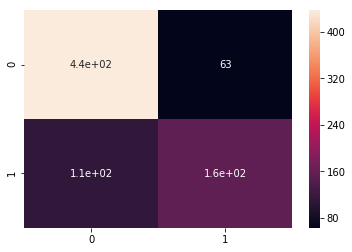

In [237]:
sns.heatmap(conf, annot=True)

In [244]:
from sklearn import tree

In [245]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, ytrain)

In [277]:
predict_proba = clf.predict_proba(X)

In [249]:
clf_pre = Series(clf.predict(X), name = 'Tree_predict')

In [253]:
result = pd.concat([result, clf_pre], axis=1)

In [255]:
from sklearn.svm import SVC
svc = SVC()
svc= svc.fit(Xtrain, ytrain)
svc_pre= Series(svc.predict(X) , name = 'svc_predict')
result = pd.concat([result, svc_pre], axis=1)

In [259]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier()
sgd= sgd.fit(Xtrain, ytrain)
sgd_pre= Series(sgd.predict(X) , name = 'sgd_predict')
result = pd.concat([result, sgd_pre], axis=1)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



In [261]:
tree_conf = metrics.confusion_matrix(y,clf_pre)
svc_conf = metrics.confusion_matrix(y,svc_pre)
sgd_conf = metrics.confusion_matrix(y,sgd_pre)

In [269]:
LR_f1 = metrics.f1_score(y,res)
tree_f1 = metrics.f1_score(y,clf_pre)
svc_f1 = metrics.f1_score(y,svc_pre)
sgd_f1 = metrics.f1_score(y,sgd_pre)

In [270]:
#the one closest to one is the most accurate and best model to use
tree_f1

0.86033519553072624

In [274]:
tree_conf

array([[462,  38],
       [ 37, 231]], dtype=int64)

In [271]:
svc_f1

0.66810344827586199

In [272]:
sgd_f1

0.54859611231101513

In [273]:
LR_f1

0.64065708418891176

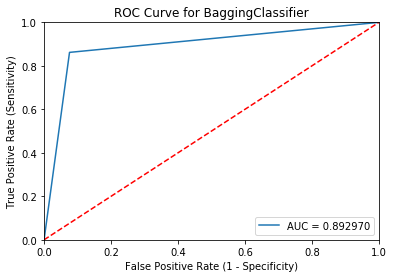

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

# Plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y, predict_proba[:,1])
auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr, label='AUC = %f' % auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for BaggingClassifier')
plt.legend(loc='lower right')
plt.show()